In [1]:
import warnings
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
import tensorflow
print(tensorflow.__version__)

2.18.0


In [2]:
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None
pd.options.display.float_format='{:.7f}'.format
pd.options.display.max_rows=None
#Reading the .h5 file and assign to a variable
import h5py

In [6]:
h5f=h5py.File('D:\\6th semester\\DIP\\dip project dataset\\Autonomous_Vehicles_SVHN_single_grey1.h5')

In [7]:
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [8]:
#Split the data into X_train,X_test,y_train,y_test
#load the training, test and validation set

In [9]:
X_train=h5f['X_train'][:]
y_train=h5f['y_train'][:]
X_test=h5f['X_test'][:]
y_test=h5f['y_test'][:]

In [10]:
#print shape of all the 4 data split into x,y,train,test to verify if x and 


In [11]:
X_train.shape

(42000, 32, 32)

In [12]:
X_test.shape

(18000, 32, 32)

In [13]:
y_train.shape

(42000,)

In [14]:
y_test.shape

(18000,)

In [16]:
import matplotlib.pyplot as plt

def img_lab(n):
    plt.figure(figsize=(n, 1))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(X_train[i], cmap='gray')
        plt.axis('off')
    plt.show()  # Move plt.show() outside the loop to display all images at once
    print('Label for each of the above images: %s' % (y_train[0:n]))


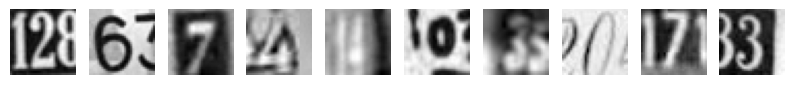

Label for each of the above images: [2 6 7 4 4 0 3 0 7 3]


In [17]:
img_lab(10)

In [18]:
X_train.shape

(42000, 32, 32)

In [19]:
X_train=X_train.reshape(X_train.shape[0],1024,1)
X_test=X_test.reshape(X_test.shape[0],1024,1)

In [20]:
X_train=X_train/255.0
X_test=X_test/255.0

In [21]:
print('Resized Training set',X_train.shape,y_train.shape)
print('Resized Test set',X_test.shape,y_test.shape)

Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)


In [22]:
from tensorflow.keras.utils import to_categorical
#one hot encode outputs
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
#no. of classes
num_classes=y_test.shape[1]
print('THe number of classes in this dataset are:',num_classes)

THe number of classes in this dataset are: 10


In [24]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

def cnn_model():
    model = Sequential()
    # First convolutional layer
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(1024, 1)))  # Add closing parenthesis and specify input channels
    model.add(MaxPooling1D(pool_size=2))
    
    # Second convolutional layer
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    # Third convolutional layer
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    # Flatten the output for the dense layers
    model.add(Flatten())
    
    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    
    # Output layer (adjust units based on the number of classes)
    model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for classification
    
    return model


In [32]:
#build the model
model=cnn_model()

In [35]:
from tensorflow.keras.optimizers import Adam

# Compile model
sgd = Adam(learning_rate=1e-3)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])


In [38]:
training_history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 99s 73ms/step - accuracy: 0.2669 - loss: 2.0125 - val_accuracy: 0.6184 - val_loss: 1.2339
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 95s 73ms/step - accuracy: 0.5424 - loss: 1.3630 - val_accuracy: 0.6674 - val_loss: 1.0354
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 99s 75ms/step - accuracy: 0.5790 - loss: 1.2436 - val_accuracy: 0.6729 - val_loss: 1.0159
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 102s 78ms/step - accuracy: 0.6009 - loss: 1.1871 - val_accuracy: 0.6854 - val_loss: 0.9616
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 117s 89ms/step - accuracy: 0.6083 - loss: 1.1391 - val_accuracy: 0.6913 - val_loss: 0.9833
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 107s 82ms/step - accuracy: 0.6257 - loss: 1.0922 - val_accuracy: 0.7086 - val_loss: 0.9174
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 87s 66ms/step - accuracy: 0.6329 - loss: 1.0707 - val_accuracy: 0.7071 - val_loss: 0.9166
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 100s 76ms/step - accuracy: 0.64

In [39]:
# Final evalution of the model
scores=model.evaluate(X_test,y_test,verbose=0)
print('Loss:',scores[0])
print('Accuracy:',scores[1])

Loss: 0.8660174012184143
Accuracy: 0.7208333611488342


Text(0.5, 1.0, 'Training and validation loss')

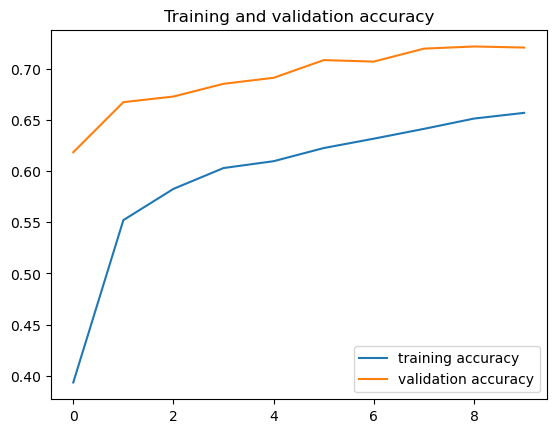

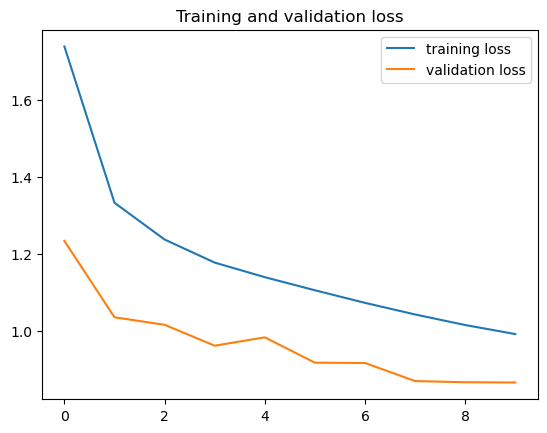

In [40]:
accuracy=training_history.history['accuracy']
val_accuracy=training_history.history['val_accuracy']
loss=training_history.history['loss']
val_loss=training_history.history['val_loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,label='training accuracy')
plt.plot(epochs,val_accuracy,label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.figure()
plt.plot(epochs,loss,label='training loss')
plt.plot(epochs,val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
